# Data Pre-Processing

#### Import Packages and CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv(r"diabetes.csv")
# Print shape of dataset
print(df.shape)

(768, 9)


## Data Cleaning

### Handling Missing values

* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset

#### Check Null Values

In [2]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

In [3]:
features_with_na

[]

* **There are no null values in the dataset**

### 3.2 Other Data Cleaning steps

**Handling Duplicates**

In [4]:
df.duplicated().sum()

0

* **No Duplicates in the dataset**

# Feature Engineering

## Feature Extraction

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Type of Features

**Numeric Features**

In [14]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 9


**Categorical Features**

In [15]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 0


**Discrete features**

In [16]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 2


**Continues Features**

In [17]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 7


### Split X and Y

* **Split Dataframe to X and y**
* **Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “Case_Status” column.**


In [7]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [8]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Feature Transformation

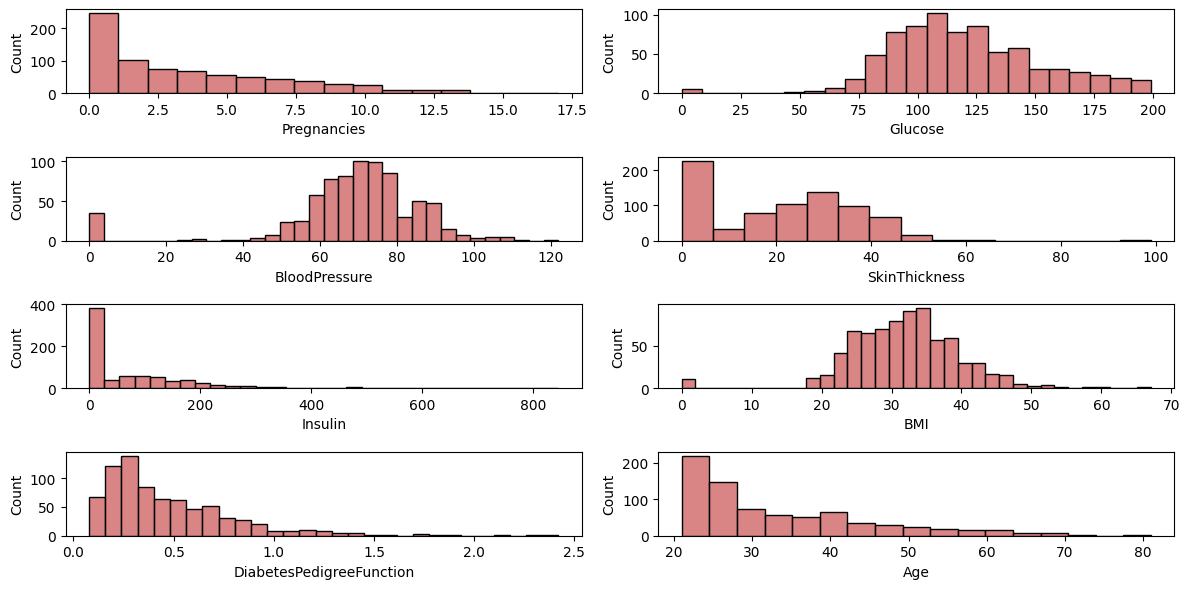

In [12]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']):
    plt.subplot(4, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

**Checking Skewness**

**What is Skewness ?**

* Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [18]:
# Check Skewness
X[continuous_features].skew(axis=0, skipna=True)

Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
dtype: float64

- Positiviely Skewed : Insulin, DiabetesPedigreeFunction, Age.
- We can handle outliers and then check the skewness.

## Apply Power Transformer to Check if it can reduces the outliers

In [19]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['Glucose', 'SkinThickness','Insulin','DiabetesPedigreeFunction','Age']
X_copy = pt.fit_transform(X[transform_features])

In [20]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

**Checking Skewness**

In [23]:
X_copy.skew(axis=0, skipna=True)

Glucose                     0.122640
SkinThickness              -0.458444
Insulin                     0.049581
DiabetesPedigreeFunction    0.142321
Age                         0.150219
dtype: float64

- Here Yeo-Johnson is used and it supports both positive or negative data for transformation.
- So Power Transformer with yeo-johnson can be used.

In [24]:
for feature in cat_features:
    print(feature,':', df[feature].nunique())

## Feature Encoding and Scaling

 **One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

**Ordinal Encoding for Columns which has many unique categories** 
* Ordinal encoding is used here as label encoder is supported for column transformer.
* Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

**Standard Scaler** 
* Standardize features by removing the mean and scaling to unit variance.

**Power Transformer**
* Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

**Selecting number features for preprocessing**

In [25]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [26]:
num_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [34]:
outcome_r = df['Outcome'] #target label
features_r = df.drop('Outcome', axis = 1) #other features
skewed = ['SkinThickness','Insulin']
features_log_transformed = pd.DataFrame(data = features_r)
features_log_transformed[skewed] = features_r[skewed].apply(lambda x: np.log(x + 1))

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Insulin','SkinThickness', 'DiabetesPedigreeFunction']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))
features_final = features_log_minmax_transform

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,0.778151,0.000000,33.6,0.234415,50
1,1,85,66,0.738561,0.000000,26.6,0.116567,31
2,8,183,64,0.000000,0.000000,23.3,0.253629,32
3,1,89,66,0.690106,0.675479,28.1,0.038002,21
4,0,137,40,0.778151,0.760921,43.1,0.943638,33


In [36]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


# Classification

In [37]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

## Train Test Split
- The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

- It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [38]:
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    outcome_r, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 614 samples.
Testing set has 154 samples.


In [39]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [40]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [41]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [42]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

## Model Training 

In [43]:
base_model_report =evaluate_models(X=features_final, y=outcome_r, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7403
- F1 score: 0.6364
- Precision: 0.6364
- Recall: 0.6364
- Roc Auc Score: 0.7172


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7468
- F1 score: 0.6667
- Precision: 0.6290
- Recall: 0.7091
- Roc Auc Score: 0.7384


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9381
- F1 score: 0.9059
- Precision: 0.9581
- Recall: 0.8592
- Roc Auc Score: 0.9196
----------------------------------
Model performance for Test set
- Accuracy: 0.7403
- F1 score: 0.6491
- Precision: 0.6271
- Recall: 0.6727
- Roc Auc Score: 0.7253


Logistic Regression
Model performance for Training 

**Results of All Models**

In [44]:
base_model_report

,Model Name,Accuracy
7,Support Vector Classifier,0.766234
6,CatBoosting Classifier,0.753247
1,Decision Tree,0.746753
3,Logistic Regression,0.746753
4,K-Neighbors Classifier,0.746753
0,Random Forest,0.740260
2,Gradient Boosting,0.740260
8,AdaBoost Classifier,0.733766
5,XGBClassifier,0.707792


**Here we can use decision Tree for Hyper Parameter Tuning**

**Define the parameter distribution for Random forest**

In [45]:
#Initialize few parameter for Hyperparamter tuning
dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(3, 10, 2),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}


svc_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto']
}


catboost_params = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.03, 0.1, 0.3],
    'iterations': [100, 300, 500],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}


In [46]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('catBoost', CatBoostClassifier(), catboost_params),
    ("SVC", SVC(), svc_params),
    ("DecisionTree", DecisionTreeClassifier(), dt_params)
]

**Create a function for model training and report which can be used in hyperparameter tuning loop**

In [49]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=5,
                                   cv=2,
                                   verbose=1, 
                                   n_jobs=-1)
    random.fit(features_final, outcome_r)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 2 folds for each of 5 candidates, totalling 10 fits
0:	learn: 0.6855494	total: 7.35ms	remaining: 727ms
1:	learn: 0.6776411	total: 12.2ms	remaining: 599ms
2:	learn: 0.6695553	total: 16.9ms	remaining: 546ms
3:	learn: 0.6638024	total: 22.2ms	remaining: 533ms
4:	learn: 0.6587359	total: 26.9ms	remaining: 512ms
5:	learn: 0.6525349	total: 32.5ms	remaining: 509ms
6:	learn: 0.6457489	total: 40.1ms	remaining: 533ms
7:	learn: 0.6406842	total: 50ms	remaining: 575ms
8:	learn: 0.6346118	total: 59.2ms	remaining: 598ms
9:	learn: 0.6289531	total: 62.7ms	remaining: 565ms
10:	learn: 0.6228802	total: 74.7ms	remaining: 604ms
11:	learn: 0.6178468	total: 86.1ms	remaining: 631ms
12:	learn: 0.6134870	total: 92.9ms	remaining: 622ms
13:	learn: 0.6081986	total: 101ms	remaining: 621ms
14:	learn: 0.6038335	total: 107ms	remaining: 606ms
15:	learn: 0.5997032	total: 113ms	remaining: 594ms
16:	learn: 0.5954772	total: 119ms	remaining: 581ms
17:	learn: 0.5915206	total: 124ms	remaining: 567ms
18:	learn: 0.5875693	

In [50]:
model_param

{'catBoost': {'learning_rate': 0.03,
  'l2_leaf_reg': 3,
  'iterations': 100,
  'depth': 8},
 'SVC': {'kernel': 'linear', 'gamma': 'scale', 'degree': 4, 'C': 100},
 'DecisionTree': {'splitter': 'best',
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': None,
  'max_depth': 9,
  'criterion': 'entropy'}}

## Retraining the Model with best Parameters

In [51]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "decision tree": DecisionTreeClassifier(**model_param['DecisionTree']),
    "SVC": SVC(**model_param['SVC']),
    "catboost": CatBoostClassifier(**model_param['catBoost']),
}
tuned_report =evaluate_models(X=features_final, y=outcome_r, models=best_models)

decision tree
Model performance for Training set
- Accuracy: 0.9495
- F1 score: 0.9274
- Precision: 0.9252
- Recall: 0.9296
- Roc Auc Score: 0.9448
----------------------------------
Model performance for Test set
- Accuracy: 0.7597
- F1 score: 0.6726
- Precision: 0.6552
- Recall: 0.6909
- Roc Auc Score: 0.7444


SVC
Model performance for Training set
- Accuracy: 0.7769
- F1 score: 0.6496
- Precision: 0.7135
- Recall: 0.5962
- Roc Auc Score: 0.7345
----------------------------------
Model performance for Test set
- Accuracy: 0.7338
- F1 score: 0.6435
- Precision: 0.6167
- Recall: 0.6727
- Roc Auc Score: 0.7202


0:	learn: 0.6849015	total: 4.35ms	remaining: 431ms
1:	learn: 0.6777098	total: 8.3ms	remaining: 407ms
2:	learn: 0.6704707	total: 11.9ms	remaining: 386ms
3:	learn: 0.6641540	total: 16.1ms	remaining: 387ms
4:	learn: 0.6583500	total: 20.1ms	remaining: 381ms
5:	learn: 0.6523895	total: 23.8ms	remaining: 373ms
6:	learn: 0.6455810	total: 27.2ms	remaining: 361ms
7:	learn: 0.6402822	tota

In [52]:
tuned_report

,Model Name,Accuracy
2,catboost,0.772727
0,decision tree,0.759740
1,SVC,0.733766


In [53]:
best_model = SVC(**model_param['SVC'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'SVC'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'SVC'
Accuracy Score value: 0.7338
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        99
           1       0.62      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



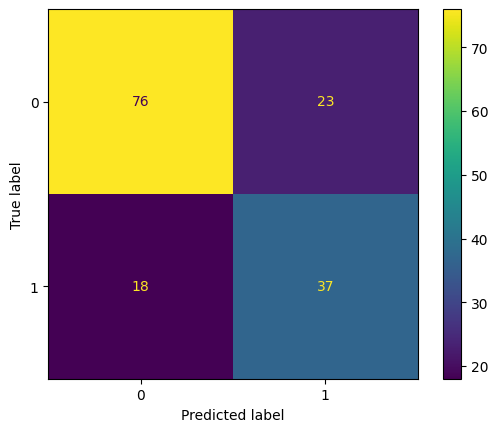

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)